In [ ]:
import nltk

In [ ]:
import random
from collections import OrderedDict

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from nltk.corpus import twitter_samples
from nltk.corpus import movie_reviews

In [ ]:
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [ ]:
import seaborn as sns
import math
import csv

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopWords = stopwords.words()

In [ ]:
stopWords = stopWords[1315:]    #reducing stopWords

In [ ]:
stopWords.append(':)')
stopWords.append(':(')
stopWords.append(')')
stopWords.append('(')
stopWords.append(',')

In [ ]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [ ]:
mvData = movie_reviews.words()

In [ ]:
len(mvData)

1583820

In [ ]:
mvData = [(movie_reviews.words(file_id), category) for file_id in movie_reviews.fileids() for category in movie_reviews.categories(file_id)]

In [ ]:
print(type(mvData))
print(len(mvData))

<class 'list'>
2000


In [ ]:
n = 0
p = 0
for i in range(len(mvData)):
  if(mvData[i][1] == 'neg'):
    n = n+1
  else:
    p = p+1

In [ ]:
print("negative reviews are ", n)
print("positive reviews are ", p)

negative reviews are  1000
positive reviews are  1000


In [ ]:
MovieData = list()

In [ ]:
for i in range(len(mvData)):
  MovieData.append(mvData[i][0])

In [ ]:
MovieData[0]

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]

In [ ]:
all_positive_reviews_tokens = list()
all_negative_reviews_tokens = list()

In [ ]:
for i in range(len(mvData)):
  if(mvData[i][1] == 'pos'):
    all_positive_reviews_tokens.append(mvData[i][0])
  else:
    all_negative_reviews_tokens.append(mvData[i][0])

In [ ]:
all_positive_reviews = list()
all_negative_reviews = list()

In [ ]:
for i in range(len(all_positive_reviews_tokens)):
  rev = all_positive_reviews_tokens[i]
  s = ""

  for word in rev:
    s = s + word
    s = s + ' '

  all_positive_reviews.append(s)

In [ ]:
for i in range(len(all_negative_reviews_tokens)):
  rev = all_negative_reviews_tokens[i]
  s = ""

  for word in rev:
    s = s + word
    s = s + ' '

  all_negative_reviews.append(s)

In [ ]:
print(len(all_positive_reviews))
print(len(all_negative_reviews))

1000
1000


In [ ]:
print(all_positive_reviews[0])
print(len(all_positive_reviews[0]))

films adapted from comic books have had plenty of success , whether they ' re about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there ' s never really been a comic book like from hell before . for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid ' 80s with a 12 - part series called the watchmen . to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . in other words , don ' t dismiss this film because of its source . if you can get past the whole comic book thing , you might find another stumbling block in from hell ' s directors , albert and allen hughes . getting the hughes brothers to direct this seems almos

In [ ]:
fields = ['label', 'review']
alltweets = all_positive_reviews + all_negative_reviews

In [ ]:
reviews = []

In [ ]:
for i in range(len(all_positive_reviews)):
  tup = []
  tup.append(1.0)
  tup.append(alltweets[i])
  reviews.append(tup)

In [ ]:
for i in range(len(all_negative_reviews)):
  tup = []
  tup.append(0.0)
  tup.append(alltweets[len(all_positive_reviews) + i])
  reviews.append(tup)

In [ ]:
reviews[499]

[1.0,
 'towards the middle of " the sweet hereafter , " a crowded school bus skids on an icy road surface as it rounds a bend , careens through the steel guard rail , and disappears out of sight . then , in long shot , we see the vehicle slowly sliding across what looks like a snow - covered field . it pauses for a moment before the " field " cracks under the bus \' weight and the bright yellow vehicle vanishes in an effortless moment , a single smooth second of time . compare that scene , if you will , to the last eighty minutes of " titanic , " when the behemoth sinks slowly and spectacularly to its watery demise , and you \' ll appreciate the futility of comparing greatness in films . the scene in " the sweet hereafter " epitomizes all that \' s right with independent canadian director atom egoyan \' s film . it \' s not sensational . we don \' t see the inside of the bus with its payload of screaming , terrified children being bloodied and battered about . the bus doesn \' t explod

In [ ]:
df = pd.DataFrame(reviews, columns=fields)

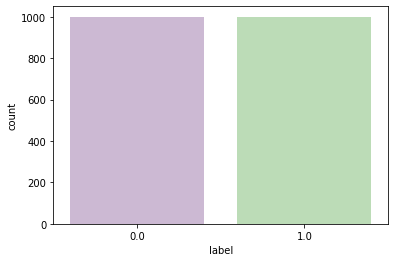

In [ ]:
sns.countplot(x='label',data =df, palette='PRGn')

In [ ]:
#dividing into train and test

train_p_mv = all_positive_reviews[:800]
test_p_mv = all_positive_reviews[800:]

train_n_mv = all_negative_reviews[:800]
test_n_mv = all_negative_reviews[800:]

train_x = train_p_mv + train_n_mv
test_x = test_p_mv + test_n_mv

In [ ]:
train_y = np.append(np.ones(len(train_p_mv)), np.zeros(len(train_n_mv)))
test_y = np.append(np.ones(len(test_p_mv)), np.zeros(len(test_n_mv)))

In [ ]:
print(len(train_y))
print(len(test_y))

1600
400


In [ ]:
def removeClutter(old_review):

  new_review = re.sub(r'@[A-Za-z0-9]+', '', old_review)   #clearing the @ symbols

  new_review = re.sub(r'^RT[\s]+','', new_review)    #clearing RT tags

  new_review = re.sub(r'https?:\/\/.*[\r\n]*','',new_review)   #removing hyperlinks

  new_review = re.sub(r'#', '',new_review)    #clearing the # symbols as well

  return new_review

In [ ]:
temp_tweet = removeClutter(all_positive_reviews[0])
temp_tweet #testing remove clutter  function

'films adapted from comic books have had plenty of success , whether they \' re about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there \' s never really been a comic book like from hell before . for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid \' 80s with a 12 - part series called the watchmen . to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . in other words , don \' t dismiss this film because of its source . if you can get past the whole comic book thing , you might find another stumbling block in from hell \' s directors , albert and allen hughes . getting the hughes brothers to direct this seems

In [ ]:
def tokenizer(tweet):
  tokens = tweet.split(" ")
  return tokens

In [ ]:
tok = tokenizer(temp_tweet)
print(tok)

['films', 'adapted', 'from', 'comic', 'books', 'have', 'had', 'plenty', 'of', 'success', ',', 'whether', 'they', "'", 're', 'about', 'superheroes', '(', 'batman', ',', 'superman', ',', 'spawn', ')', ',', 'or', 'geared', 'toward', 'kids', '(', 'casper', ')', 'or', 'the', 'arthouse', 'crowd', '(', 'ghost', 'world', ')', ',', 'but', 'there', "'", 's', 'never', 'really', 'been', 'a', 'comic', 'book', 'like', 'from', 'hell', 'before', '.', 'for', 'starters', ',', 'it', 'was', 'created', 'by', 'alan', 'moore', '(', 'and', 'eddie', 'campbell', ')', ',', 'who', 'brought', 'the', 'medium', 'to', 'a', 'whole', 'new', 'level', 'in', 'the', 'mid', "'", '80s', 'with', 'a', '12', '-', 'part', 'series', 'called', 'the', 'watchmen', '.', 'to', 'say', 'moore', 'and', 'campbell', 'thoroughly', 'researched', 'the', 'subject', 'of', 'jack', 'the', 'ripper', 'would', 'be', 'like', 'saying', 'michael', 'jackson', 'is', 'starting', 'to', 'look', 'a', 'little', 'odd', '.', 'the', 'book', '(', 'or', '"', 'grap

In [ ]:
punctuations = string.punctuation

In [ ]:
def remove_stopwords_punctuations(tweet_token):

  cleaned_tweet = list()

  for word in tweet_token:

    if( word not in punctuations and word not in stopWords):
      cleaned_tweet.append(word)

  return cleaned_tweet

In [ ]:
#stemming the words i.e working to work
stemmer = PorterStemmer()

In [ ]:
def tweet_stemmer(tweet):
  stemmed_tweet = list()

  for word in tweet:
    stemm_word = stemmer.stem(word)
    stemmed_tweet.append(stemm_word)

  return stemmed_tweet

In [ ]:
def preprocessing(tweet):

  new_tweet = removeClutter(tweet)        #remove @, #, Retweets, hyperlinks

  tweet_tokens = tokenizer(new_tweet)    #tokenize the tweet

  tokenCount = 0
  tokenCount = len(tweet_tokens)

  tweet_processed = remove_stopwords_punctuations(tweet_tokens)     # remove stopwords, puntuations

  tweet_processed = tweet_stemmer(tweet_processed)        # stemm the tokens

  return tweet_processed, tokenCount

In [ ]:
processed_tweets=list()

In [ ]:
tokenCountOfReviews = list()

In [ ]:
#processing the tweets

for tweet in train_x:
  twt,lenOfTweet = preprocessing(tweet)
  processed_tweets.append(twt)
  tokenCountOfReviews.append(lenOfTweet)

In [ ]:
type(processed_tweets)

list

In [ ]:
len(tokenCountOfReviews)

1600

In [ ]:
summ = 0
for i in tokenCountOfReviews:
  summ = summ + i

print(summ)

1268106


In [ ]:
def findStats(tokenCountOfReviews):

  avgTweetLen = 0
  avgTweetLen = summ/len(tokenCountOfReviews)

  ind = 0
  if(len(tokenCountOfReviews)%2 == 0):
    ind = len(tokenCountOfReviews)/2
  else:
    ind = len((tokenCountOfReviews)/2) + 1

  median = tokenCountOfReviews[int(ind)]


  variance = 0
  sqDiff = 0
  for i in tokenCountOfReviews:
    sqDiff = sqDiff + (i-avgTweetLen)**2

  variance = sqDiff/len(tokenCountOfReviews)

  stddev = math.sqrt(variance)

  return avgTweetLen, median, variance, stddev

In [ ]:
mean, median, var, stddev = findStats(tokenCountOfReviews)

print(mean)
print(median)
print(var)
print(stddev)

792.56625
880
121967.87686093728
349.23899676430364


In [ ]:
#making a dict

def freqDict(processed_tweets, y):

  FreqDict = dict()

  for tweet,yc in zip(processed_tweets, y):

    for word in tweet:
      pair = (word,yc)                                  #this dict contains pairs of (word, class)->freq  ex (good, 1.0)->10, good could also occur in bad class but with less freq (good, 0.0)->1
      if(pair not in FreqDict):
        FreqDict[(pair)] = 1
      else:
        FreqDict[(pair)] += 1

  return FreqDict

In [ ]:
FreqDict = freqDict(processed_tweets, train_y)    #making the FreqDict

In [ ]:
len(FreqDict)

35420

In [ ]:
ctr = 0
for key,value in FreqDict.items():           #printing some values of FreqDict
  if(ctr <= 5):
    print(key,value)
  else: break
  ctr += 1

('film', 1.0) 4921
('adapt', 1.0) 69
('comic', 1.0) 227
('book', 1.0) 192
('plenti', 1.0) 68
('success', 1.0) 219


In [ ]:
def calculate_probs(FreqDict, train_x, train_y):

  logpriorProb = 0
  loglikelihood = dict()     # storing the words with there likelihoods in respective classes

  unique_words = set([pair[0] for pair in FreqDict.keys()])
  len_unique_words = len(unique_words)

  n_pos = 0   #no of words in positive class
  n_neg = 0   #no of words in negative class

  indexChromo = 0

  for pair in FreqDict.keys():          # for each pair in FreqDict inc n_pos if word belongs to pos class or inc n_neg if word belongs to neg class

    if(pair[1] > 0):                             # if(pair[1] > 0 and chromo[i] != 0): n_pos = freqdict[(pair)]
      n_pos += FreqDict[(pair)]
    else:
      n_neg += FreqDict[(pair)]

    indexChromo += 1

  n_tweets = len(train_y)

  d_pos = len(all_positive_reviews)
  d_neg = len(all_negative_reviews)

  logpriorProb = np.log(  (d_pos / d_neg) )         # if greater than zero then more prior prob of being in positive class and vice versa

  for word in unique_words:

    no_appear_in_pos = FreqDict.get((word,1), 0)    #return zero if not present
    no_appear_in_neg = FreqDict.get((word,0), 0)


    prob_word_being_in_pos = (no_appear_in_pos+1 / (n_pos + len_unique_words))    # plus 1 is smoothening factor to prevent getting division by zero error while calculating loglikelihood
    prob_word_being_in_neg = (no_appear_in_neg+1 / (n_neg + len_unique_words))    # it could so happen that some count of some word might be zero for some class
                                                                                  # the denominator is also increased to compensate the smoothening factor

    loglikelihood[word] = np.log(prob_word_being_in_pos/prob_word_being_in_neg)      # confidence of a word for being in either class, if greater than zero then in pos and vice versa

  return logpriorProb, loglikelihood          #loglikelihood contains the loglikelihood of each unique word existing in the dictionary


In [ ]:
logprior, loglikelihood = calculate_probs(FreqDict, train_x, train_y)

In [ ]:
print(logprior)   # zero becoz we have the same number of pos and neg tweets

0.0


In [ ]:
print(len(loglikelihood))   # mapping of all unique words and there confidence of being in either class based upon there occurences in respective classes
print(type(loglikelihood))

23728
<class 'dict'>


In [ ]:
p = 10
print("THESE ARE SOME OF THE FEATURES....\n")
for key, value in loglikelihood.items():
  if( p >= 1 ):
    print(key)
  p-=1

THESE ARE SOME OF THE FEATURES....

genom
ngo
recov
crackin
conson
nephew
robin
allerg
_elect
detriment


In [ ]:
def predict(tweet, logprior, loglikelihood):         # testing function for sentiment analysis without feature selection

  processed_input, t = preprocessing(tweet)  # process the input tweet first
  p = 0
  p = p+logprior                 # add logprior

  for word in processed_input:            #calculate loglikelihood of each token from the loglikelihood dictionary and add into final value

    if( word not in loglikelihood):
      p+=0
    else:
      p+= loglikelihood[word]         # we are adding everything instead of multiplying becoz it is log( prior * likelihood)

  return p

In [ ]:
def predictForChromosome(tweet, logprior, loglikelihood, chromosome):       # testing function for sentiment analysis with feature selection

  # create a datastructure that combines loglikelihood and a chromosome

  combinedDS = dict()
  newPairs = []

  ind = 0
  for key in loglikelihood.keys():
    p = (key,chromosome[ind])
    newPairs.append(p)
    ind += 1

  combinedDS = dict(zip(newPairs, list(loglikelihood.values())))      #{ (word1,1):21 , (word2,0): -10, (word3,0): 5, (word4,1): -12, .....}


  processed_input,t = preprocessing(tweet)  # process the input tweet first
  p = 0
  p = p+logprior                 # add logprior

  for word in processed_input:            #calculate loglikelihood of each token from the loglikelihood dictionary and add into final value
    pr = (word,1)

    if( pr not in combinedDS):        # if the word happens to be in loglikelihood and allowed feature set denoted by chromosome then add its p value
      p+=0
    else:
      p+= combinedDS[pr]         # we are adding everything instead of multiplying becoz it is log( prior * likelihood)

  return p

In [ ]:
def showPolarity(prediction):                 # used to show the polarity {positive, negative or neutral}

  if(prediction<=1.0 and prediction >= -0.80):
    polarity = "Neutral"

  elif(prediction> 1.0):
    polarity = "Positive"

  elif(prediction < -0.80):
    polarity = "Negative"
  return polarity

In [ ]:
def testing(test_x, test_y, logprior, loglikelihood):       # testing function for sentiment analysis without feature selection

  correct = 0
  incorrect = 0
  i=0
  for tweet in test_x:
    pred = predict(tweet, logprior, loglikelihood)
    if(pred < 0):
      pred = 0.0
    else:
      pred = 1.0

    if(pred == test_y[i]):
      correct += 1
    else:
      incorrect += 1

    i = i+1

  return (correct/float(len(test_x)))*100

In [ ]:
def testingForChromosome(test_x, test_y, logprior, loglikelihood, chromosome):      # testing function for sentiment analysis with feature selection

  correct = 0
  incorrect = 0
  i=0
  for tweet in test_x:
    pred = predictForChromosome(tweet, logprior, loglikelihood, chromosome)
    if(pred < 0):
      pred = 0.0
    else:
      pred = 1.0

    if(pred == test_y[i]):
      correct += 1
    else:
      incorrect += 1

    i = i+1

  return (correct/float(len(test_x)))*100

In [ ]:
acc = testing(test_x, test_y, logprior, loglikelihood)

In [ ]:
print("accuracy is ", acc)

accuracy is  69.25


In [ ]:
def makeChromosome(loglikelihood):                #chromosome looks like [0,1,0,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0.........upto vocab size]
  chromosome = []

  for word in loglikelihood:
    n = random.randint(0,1)
    chromosome.append(n)

  return chromosome

In [ ]:
def makePopulation(size, loglikelihood):          #collections of chromosomes

  pop = []
  for i in range(size):
    chromo = makeChromosome(loglikelihood)
    pop.append(chromo)

  return pop

In [ ]:
def findScore(text_x, test_y, logprior, loglikelihood, chromosome):

  score = 0.0

  score += testingForChromosome(test_x, test_y, logprior, loglikelihood, chromosome)    # applying NB classifier and testing the accuracy( also happens to be the score) obtained for each chromosome
  return score

In [ ]:
def evaluatePop(text_x, test_y, logprior, loglikelihood, pop):         #dict{  56: [chromo1, chromo2,..], 78:[chromo1, chromo2, ...]}   i.e { acc1: [c1,c2,c3..], acc2: [c1,c2,c3,,,]}

  scores = dict()
  chromoNumber = 0
  for chromo in pop:
    print("chromoNumber is ", chromoNumber+1)
    score = findScore(text_x, test_y, logprior, loglikelihood, chromo)

    if(score not in scores):
      scores[score] = []
      scores[score].append(chromo)
    else:
      scores[score].append(chromo)

    chromoNumber += 1

  return scores

In [ ]:
def normalizeScores(scores):         # to make the total scores of chromosomes to add up to 1
                                    # this will help us  when selectiing parents for mating
  sum =0.0
  for key in scores.keys():
    sum += key

  newkeys = []      # stores the new keys

  for key in scores.keys():
    key = key/float(sum)
    newkeys.append(key)

  scores = dict(zip(newkeys, list(scores.values())))

  return scores

In [ ]:
def crossover(parent1, parent2):              # for each bit there is a 50-50% chance of selecting from parent1 or parent 2

  lenOfChild = len(parent1)

  child = []

  for i in range(lenOfChild):

    randomNum = random.randint(0,1)
    if(randomNum == 0):
      child.append(parent1[i])
    else:
      child.append(parent2[i])

  return child

In [ ]:
def mutate(child, mutationRate):

  for i in range(len(child)):
    randNum = random.random()            # pick a random number
    if(randNum <= mutationRate):
      child[i] = 1^child[i]               # EXORing operation to flip the bit if random number is less than the mutation rate

  return child

In [ ]:
def spinRouletteWheel(scores):

  wheel = []            # a list of pair of pairs , like so pair( pair(range), key)

  prevkey = 0.0

  start = True

  for key in scores.keys():
    add = prevkey + key
    p1 = (prevkey,add)
    p2 = (p1,key)
    wheel.append(p2)
    prevkey = add

  n = random.random()    # float value between 0 and 1
  key = 0.0
  for p in wheel:
    if(n<p[0][1] and n>=p[0][0]):
      key = p[1]
      break

  return key,n


In [ ]:
def selection(scores, pop, mutationRate):                                 # return the nxt population after selecting the same ammount of individuals as prev population

  sizeofprevPop = len(pop)
  scores = OrderedDict(sorted(scores.items()))          # sorts the dictionary based on the key i.e fitness of chromosome i.e the acc of the chromosome on NB
  nxt_pop = []

 # all_chromosomes = []                        # list that stores all the chromosomes from prev pop in a sorted manner
 # for key,value in scores.items():
  #  for ch in value:
   #   all_chromosomes.append(ch)

  normalizedScores = normalizeScores(scores)       # normalizes the scores dictionary

  # creating the nxt population

  for t in range(sizeofprevPop):
    numOfParents = 2
    parents = []
    for i in range(numOfParents):                         #picking 2 number of parents everytime
      k,randnum = spinRouletteWheel(normalizedScores)

      numOfChromosomes = len(normalizedScores[k])

      if(numOfChromosomes == 1):                         #only one chromosome for the key k
        parents.append(normalizedScores[k][0])

      else:
        rand = random.randint(0, numOfChromosomes-1)     # list of chromosomes for the key k
        parents.append(normalizedScores[k][rand])


    child = crossover(parents[0], parents[1])                # crossingover
    child = mutate(child,mutationRate)                      # mutating the child
    nxt_pop.append(child)                                   # putting the child in nxt_pop

  return nxt_pop


In [ ]:
def featureSelection(text_x, test_y, logprior, popSize, mutationRate, generations, loglikelihood):

  prevPopulation = makePopulation(popSize, loglikelihood)         # a list of chromosomes each of len feature set size i.e loglikelihood size

  for i in range(generations):
    print("generation number ", i+1)

    scores = evaluatePop(text_x, test_y, logprior, loglikelihood, prevPopulation)                           # gives a dictionary with scores and corresponding chromosomes
    nextPopulation = selection(scores, prevPopulation,mutationRate)   # create new pop based on the scores
    prevPopulation = nextPopulation                                   # make prevpop as nxt pop and repeat the whole process

  print("calculating accuracies for final population")
  finalScores = evaluatePop(text_x, test_y, logprior, loglikelihood, nextPopulation)

  sortedFinalScores = OrderedDict(sorted(finalScores.items(), reverse=True))

  finalChromosome = []

  #sortedFinalScores = sorted(finalScores, reverse=True)

  j = 1
  for key, value in sortedFinalScores.items():
    if(j>=1):
      finalChromosome = value[0]
    j-=1

  return finalChromosome                                     # returns a binary list of 1's and 0's denoting which features to select and which ones to reject

In [ ]:
def accAfterFeatureSelection(text_x, test_y, logprior, popSize, mutationRate, generations, loglikelihood):

  finalChromo = featureSelection(text_x, test_y, logprior, popSize, mutationRate, generations, loglikelihood)

  accForchromo = testingForChromosome(test_x, test_y, logprior, loglikelihood, finalChromo)
  return accForchromo, finalChromo

In [ ]:
popsize = 10
mutRate = 0.03
generations = 15

In [ ]:
res, finalChromosome = accAfterFeatureSelection(test_x, test_y, logprior, popsize,mutRate, generations,loglikelihood)

generation number  1
chromoNumber is  1
chromoNumber is  2
chromoNumber is  3
chromoNumber is  4
chromoNumber is  5
chromoNumber is  6
chromoNumber is  7
chromoNumber is  8
chromoNumber is  9
chromoNumber is  10
generation number  2
chromoNumber is  1
chromoNumber is  2
chromoNumber is  3
chromoNumber is  4
chromoNumber is  5
chromoNumber is  6
chromoNumber is  7
chromoNumber is  8
chromoNumber is  9
chromoNumber is  10
generation number  3
chromoNumber is  1
chromoNumber is  2
chromoNumber is  3
chromoNumber is  4
chromoNumber is  5
chromoNumber is  6
chromoNumber is  7
chromoNumber is  8
chromoNumber is  9
chromoNumber is  10
generation number  4
chromoNumber is  1
chromoNumber is  2
chromoNumber is  3
chromoNumber is  4
chromoNumber is  5
chromoNumber is  6
chromoNumber is  7
chromoNumber is  8
chromoNumber is  9
chromoNumber is  10
generation number  5
chromoNumber is  1
chromoNumber is  2
chromoNumber is  3
chromoNumber is  4
chromoNumber is  5
chromoNumber is  6
chromoNumber is  

In [ ]:
count = 0
for i in finalChromosome:
  if(i == 1):
    count+=1

In [ ]:
print("total features selected are ", count, "out of ", len(loglikelihood))
print("accuracy after feature selection is ", res)

total features selected are  11742 out of  23728
accuracy after feature selection is  68.0


In [ ]:
sad